In [2]:
import pandas as pd
import numpy as np

In [3]:
doc = pd.read_excel('Final_Train.xlsx')
doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
doc.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
doc['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

### Rating

In [7]:
doc['Rating'].value_counts().index[0:]

Index(['100%', '98%', '99%', '97%', '96%', '95%', '94%', '93%', '92%', '90%',
       '91%', '89%', '88%', '85%', '82%', '86%', '83%', '80%', '77%', '87%',
       '84%', '79%', '67%', '81%', '76%', '71%', '73%', '75%', '74%', '60%',
       '78%', '68%', '56%', '70%', '69%', '57%', '72%', '63%', '33%', '62%',
       '64%', '55%', '40%', '45%', '48%', '47%', '58%', '53%', '36%', '65%',
       '7%'],
      dtype='object')

In [8]:
doc["Rating"]=doc["Rating"].str.strip("%")

In [9]:
#Let's convert the data into float.

doc["Rating"]=doc["Rating"].astype(float)

In [10]:
doc['Rating'].dtype

dtype('float64')

In [11]:
doc["Rating"]

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
5956     98.0
5957      NaN
5958     97.0
5959     90.0
5960    100.0
Name: Rating, Length: 5961, dtype: float64

'Rating' has 55.3% of Null values which is like half of the whole data.

The range of percentages varying from 100% to 7%.

For some reason, there are missing rows in it having no rating for the respective doctor. Thus, we cannot just take the mean or median of the data to replace those. That will be the falsifying of information.

Instead, we can just replace the missing values with 0 since it will neither falsify the info nor affect the target wrongly.

In [12]:
doc["Rating"].fillna(0,inplace=True)

In [13]:
doc.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [14]:
doc['Place']

0                 Kakkanad, Ernakulam
1               Whitefield, Bangalore
2          Mathikere - BEL, Bangalore
3        Bannerghatta Road, Bangalore
4               Keelkattalai, Chennai
                    ...              
5956          Basavanagudi, Bangalore
5957            Nungambakkam, Chennai
5958    Greater Kailash Part 2, Delhi
5959           Vileparle West, Mumbai
5960                 Pitampura, Delhi
Name: Place, Length: 5961, dtype: object

In [15]:
doc["Place"].fillna("Unknown,Unknown",inplace=True) #Missing values are being replaced by unknown respevtively for now.

In [16]:
doc['Area']=doc['Place'].str.rsplit(',',1).str.get(0) #First name in the column will be assigned to 'City' column.

In [17]:
doc['City']=doc['Place'].str.rsplit(',',1).str.get(1) #Last name in the column will be replaced in 'Place' column.

In [18]:
doc['City']=doc['City'].str.strip()

In [19]:
doc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai


In [20]:
doc['Area'].isnull().sum(), doc['City'].isnull().sum()

(0, 1)

'City' column seems to have a null value in it, needs to be removed.

In [21]:
doc[doc['City'].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
3980,BDS,23 years experience,0.0,e,Dentist,NaN,250,e,NaN


In [22]:
doc.loc[doc['City'].isnull(),'Area']

#It can be assingned to the 'Unknown' for both city and area.

3980    e
Name: Area, dtype: object

In [23]:
doc.loc[doc['City'].isnull(),'Area']='Unknown'
doc['City']=doc['City'].fillna('Unknown')

In [24]:
doc['Area'].isnull().sum(), doc['City'].isnull().sum()

(0, 0)

In [25]:
#We can drop 'Place' now.

doc.drop(['Place'], 1, inplace = True)

In [26]:
doc['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 26
Name: City, dtype: int64

Let's drop 'Area' column since it is an extra info as we have 'City'.

In [27]:
doc.drop(['Area'], 1, inplace = True)

In [28]:
doc

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24 years experience,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0.0,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20 years experience,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98.0,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33 years experience,0.0,General Medicine,NaN,100,Chennai
5958,MBBS,41 years experience,97.0,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15 years experience,90.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


'Experience' column has the format of number(amount experience) and words.
we need to strip of " years experience" from it to leave only number.

In [29]:
doc["Experience"]=doc["Experience"].str.strip(" years experience")

In [30]:
#We can now convert it to int

doc["Experience"]=doc["Experience"].astype(int)

In [31]:
doc["Experience"].dtype

dtype('int32')

In [32]:
doc

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0.0,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore
5957,MBBS,33,0.0,General Medicine,NaN,100,Chennai
5958,MBBS,41,97.0,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi
5959,"MBBS, MD - General Medicine",15,90.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai


The data is ready enough to check the correlation and for visualization of data.

#### EDA

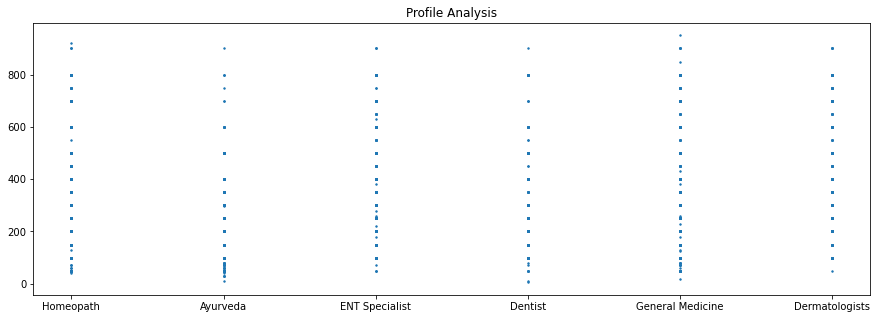

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.title('Profile Analysis')

plt.scatter(doc['Profile'],doc['Fees'],s=2)
plt.show()

The fee distribution can be seen from the above plot with respective to the profile but unable to get a clear picture.

Pie Chart gives the clear picture to understand which profile has more average fee

In [34]:
profile=doc['Profile'].value_counts().index

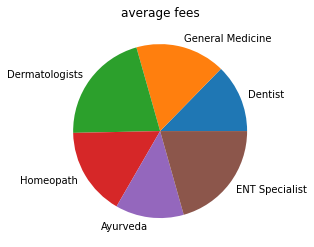

In [35]:
#More clear understanding can be obtained with help of Pie chart.

arr=[]
for i in profile:
  x=doc[doc['Profile']==i] #It will iterate one respective profile after the other to 'x'
  arr.append(np.mean(x['Fees'])) #The mean/average of fees is appended to arr
plt.title('average fees')
plt.pie(arr,labels=profile)
plt.show()

It states that 'Ayurveda' doctors earns less than others.

whereas the 'Dermatologists' and the 'ENT' specialists are earning more.

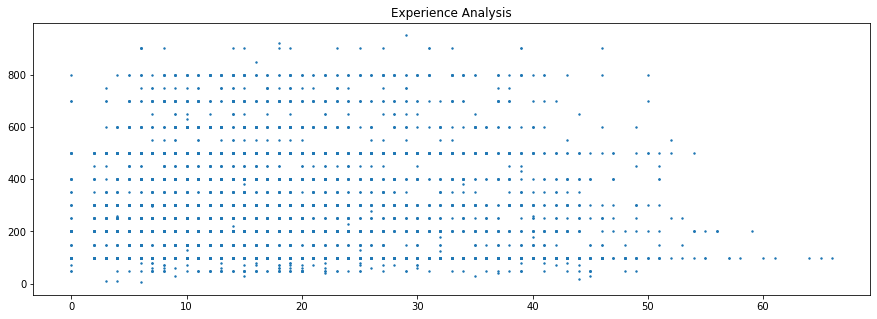

In [36]:
plt.figure(figsize=(15,5))
plt.title('Experience Analysis')

plt.scatter(doc['Experience'],doc['Fees'],s=2)
plt.show()

The fee seems to be charged more if the experience is somewhere near 30.

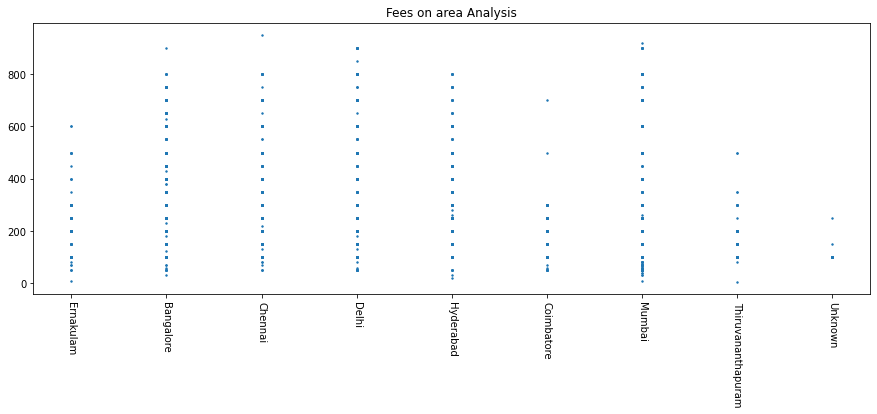

In [37]:
plt.figure(figsize=(15,5))
plt.title('Fees on area Analysis')

plt.scatter(doc['City'],doc['Fees'],s=2) #s=2 will give us clear dotted plot.
plt.xticks(rotation=270) #The City names on x-axis will be shown in 270 degree allinged with the plotting.
plt.show()

Chennai, Bangalore, Mumbai cities seem to have more average of fee being charged comparatively.

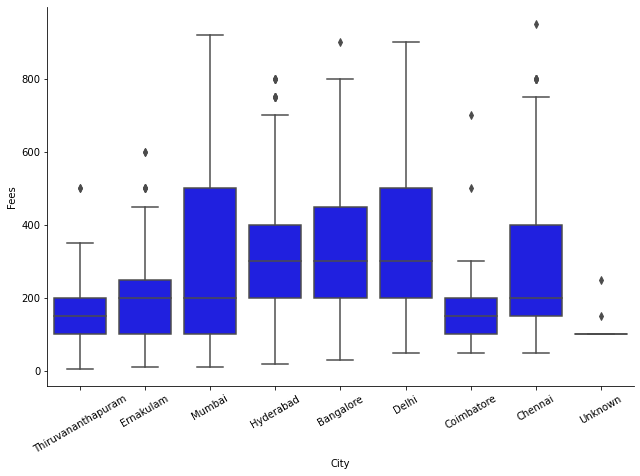

In [38]:
sns.catplot(x='City',y='Fees', data=doc.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.xticks(rotation=30)
plt.show()

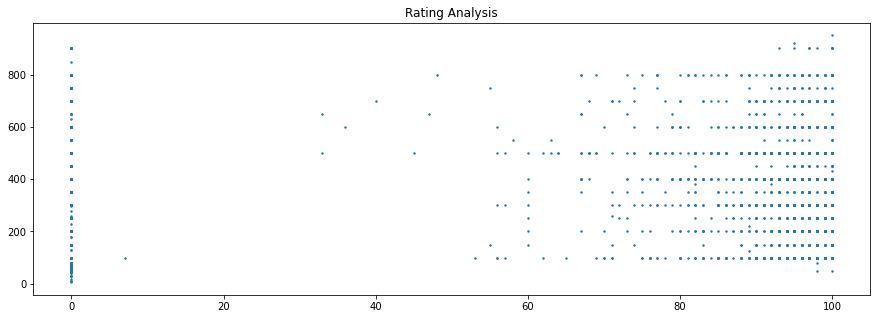

In [39]:
xx=doc[doc['Rating']>=0.0]
plt.figure(figsize=(15,5))
plt.title('Rating Analysis')

plt.scatter(xx['Rating'],xx['Fees'],s=2)
plt.show()

60% to 100% rated doctors/clinics have highers desnsity of customers, so do their fee.

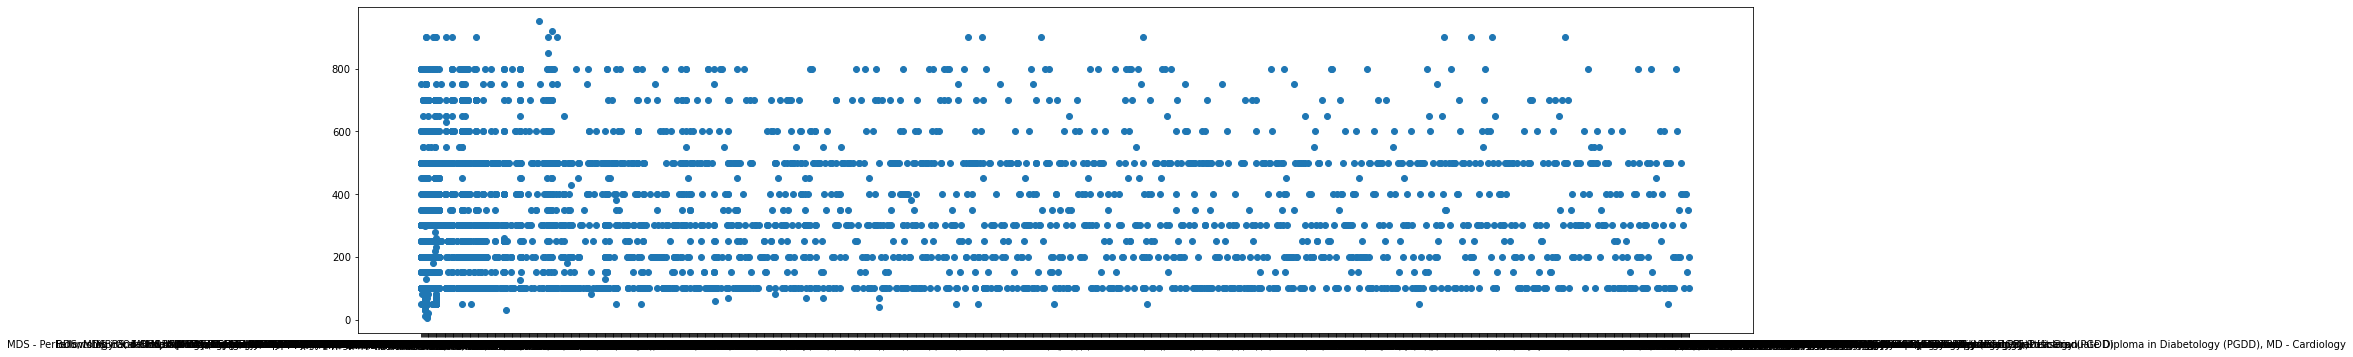

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (25,6))
plt.scatter(doc['Qualification'],doc['Fees'])

There are object datatypes which needs to be convreted for the model.

In [41]:
City=doc.groupby('City')['Fees'].mean()

In [42]:
doc['City']=doc['City'].map(City)

In [43]:
doc.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,188.431373
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,328.842607
2,"MBBS, MS - Otorhinolaryngology",9,0.0,ENT Specialist,NaN,300,328.842607
3,"BSc - Zoology, BAMS",12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,328.842607
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,283.602339


### Miscellaneous_Info

In [44]:
for i in doc['Miscellaneous_Info'].value_counts().index:
    
  doc['Miscellaneous_Info'].replace(i,int(1),inplace=True)

doc['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [45]:
doc['Miscellaneous_Info'].unique()

array([1., 0.])

In [46]:
doc

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,1.0,100,188.431373
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,1.0,350,328.842607
2,"MBBS, MS - Otorhinolaryngology",9,0.0,ENT Specialist,0.0,300,328.842607
3,"BSc - Zoology, BAMS",12,0.0,Ayurveda,1.0,250,328.842607
4,BAMS,20,100.0,Ayurveda,1.0,250,283.602339
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98.0,ENT Specialist,1.0,300,328.842607
5957,MBBS,33,0.0,General Medicine,0.0,100,283.602339
5958,MBBS,41,97.0,General Medicine,1.0,600,362.911392
5959,"MBBS, MD - General Medicine",15,90.0,General Medicine,1.0,100,308.292863


### Qualification

In [47]:
doc['Qualification'][:25]

0                                 BHMS, MD - Homeopathy
1                          BAMS, MD - Ayurveda Medicine
2                        MBBS, MS - Otorhinolaryngology
3                                   BSc - Zoology, BAMS
4                                                  BAMS
5                                                  BAMS
6                                                  BHMS
7                                                   BDS
8                           MBBS, MD - General Medicine
9                                              BSc, BDS
10                                  MBBS, MS, DNB - ENT
11                                                 BAMS
12                                             BDS, MDS
13              BDS, MDS - Oral & Maxillofacial Surgery
14    MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                          MBBS, MD - General Medicine
16           MBBS, Diploma in Otorhinolaryngology (DLO)
17                                 MBBS, MF- Hom

In [48]:
def changequali(x):
    space=x.split(' ') #Spacing can be ommited from the column
    comma=x.split(',') #commas as well.
    if ',' not in x:
        return space[0]
    else:
        return comma[0]

In [49]:
doc['Qualification']=doc['Qualification'].apply(changequali)

In [50]:
def removedash(x):
    dash=x.split('-') #Dashes will be removed.
    if '-' in x:
        return dash[0]
    else:
        return x

In [51]:
doc['Qualification']=doc['Qualification'].apply(removedash)

In [52]:
doc['Qualification'].value_counts()[:50]

MBBS                                                  2448
BDS                                                   1208
BAMS                                                   711
BHMS                                                   706
MD                                                     264
MDS                                                    121
MS                                                      89
MD                                                      63
MDS                                                     46
DNB                                                     37
Get                                                     24
MS                                                      21
DHMS                                                    21
DDVL                                                    20
DHMS (Diploma in Homeopathic Medicine and Surgery)      15
Diploma in Otorhinolaryngology (DLO)                    14
LCEH                                                    

In [53]:
def Correction(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [54]:
doc['Qualification']=doc['Qualification'].apply(Correction)

In [55]:
doc['Qualification'].value_counts()

MBBS                            2448
BDS                             1208
BAMS                             711
BHMS                             706
MD                               264
                                ... 
FRCP                               1
Ayurvedic panchkarma               1
MSc                                1
FAGE                               1
POST GRADUATE IN HOMOEOPATHY       1
Name: Qualification, Length: 73, dtype: int64

In [56]:
qualification=doc.groupby('Qualification')['Fees'].mean()

In [57]:
doc['Qualification']=doc['Qualification'].map(qualification)

### Profile

In [58]:
profile=doc.groupby('Profile')['Fees'].mean()

In [59]:
doc['Profile']=doc['Profile'].map(profile)

### Transforming the data into more easier for the model.

#### Rating

In [60]:
def trans(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the model readability.
    if x>50:
        return 2

In [61]:
doc['Rating']=doc['Rating'].apply(trans)

In [62]:
doc.groupby('Rating')['Fees'].mean()

Rating
1    280.487311
2    342.227461
Name: Fees, dtype: float64

In [63]:
doc['Rating'].value_counts(normalize=True)

1    0.555276
2    0.444724
Name: Rating, dtype: float64

#### Experience

In [64]:
def trans2(x):
    if x<=33:#33 because the max experience is 66
        return 1 #for meaningful magnitude
    if x>33:
        return 2

In [65]:
doc['Experience']=doc['Experience'].apply(trans2)

In [66]:
doc.groupby('Experience')['Fees'].mean()

Experience
1    312.954683
2    268.045113
Name: Fees, dtype: float64

In [67]:
doc['Experience'].value_counts(normalize=True)

1    0.888442
2    0.111558
Name: Experience, dtype: float64

In [68]:
doc

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City
0,301.500000,1,2,306.499407,1.0,100,188.431373
1,234.457103,1,2,238.968193,1.0,350,328.842607
2,358.261846,1,1,387.321429,0.0,300,328.842607
3,175.000000,1,1,238.968193,1.0,250,328.842607
4,234.457103,1,2,238.968193,1.0,250,283.602339
...,...,...,...,...,...,...,...
5956,358.261846,1,2,387.321429,1.0,300,328.842607
5957,358.261846,1,1,313.908781,0.0,100,283.602339
5958,358.261846,2,2,313.908781,1.0,600,362.911392
5959,358.261846,1,2,313.908781,1.0,100,308.292863


In [69]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   float64
 1   Experience          5961 non-null   int64  
 2   Rating              5961 non-null   int64  
 3   Profile             5961 non-null   float64
 4   Miscellaneous_Info  5961 non-null   float64
 5   Fees                5961 non-null   int64  
 6   City                5961 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 326.1 KB


In [70]:
#Let's split the data into x and y.

y = doc.iloc[:, -2]
x = doc.drop(['Fees'], 1)

In [71]:
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5961, dtype: int64

In [72]:
x

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City
0,301.500000,1,2,306.499407,1.0,188.431373
1,234.457103,1,2,238.968193,1.0,328.842607
2,358.261846,1,1,387.321429,0.0,328.842607
3,175.000000,1,1,238.968193,1.0,328.842607
4,234.457103,1,2,238.968193,1.0,283.602339
...,...,...,...,...,...,...
5956,358.261846,1,2,387.321429,1.0,328.842607
5957,358.261846,1,1,313.908781,0.0,283.602339
5958,358.261846,2,2,313.908781,1.0,362.911392
5959,358.261846,1,2,313.908781,1.0,308.292863


All the columns are irregular, thus let's bring it into a standard scale.

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [74]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5
0,-0.102586,-0.354354,1.117401,-0.023436,0.885549,-2.386542
1,-1.169781,-0.354354,1.117401,-1.118513,0.885549,0.417308
2,0.800954,-0.354354,-0.894934,1.287163,-1.129243,0.417308
3,-2.116224,-0.354354,-0.894934,-1.118513,0.885549,0.417308
4,-1.169781,-0.354354,1.117401,-1.118513,0.885549,-0.486088
...,...,...,...,...,...,...
5956,0.800954,-0.354354,1.117401,1.287163,0.885549,0.417308
5957,0.800954,-0.354354,-0.894934,0.096714,-1.129243,-0.486088
5958,0.800954,2.822040,1.117401,0.096714,0.885549,1.097623
5959,0.800954,-0.354354,1.117401,0.096714,0.885549,0.006954


In [75]:
# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

In [77]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

# make our own scorer
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)

In [78]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [79]:
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.7678373890136307
SVR() 0.8059111221447863
DecisionTreeRegressor() 0.7858103430051612
RandomForestRegressor() 0.7934251701293903


### HyperParmater Tuning

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [81]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])

#gridsearch = GridSearchCV(svm_reg, param_grid=parameters, cv=5, scoring=scorer verbose=1, n_jobs=-1)
svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [82]:
svm_random.fit(x_train,y_train)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   36.6s finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [83]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.8069526163408867
best_params:
 {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}


In [84]:
# predict the test data from it and see the result
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.8086080056949372


#### Trying Hyperparameter tuning for RandomForest Regressor

In [85]:
#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5]
#max_features
max_features=['sqrt','auto']

# generate a dictionary of all the Hyper Parameters
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5], 'max_features': ['sqrt', 'auto']}


In [86]:
rf_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=100, random_state=42, verbose=1, n_jobs=-1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [87]:
print("best_params:\n",rf_random.best_params_)
print("\nbest_score:",rf_random.best_score_)

best_params:
 {'n_estimators': 660, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 24}

best_score: 0.7975657756726834


Root-Mean-Squared-Log-Error (RMSLE) is 0.8 which is solid score.

Out of all the models we've checked, RandomForestRegressor() 0.79 has the best score.

In [88]:
import pickle
filename = 'doctor.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))

## Test Model

In [89]:
doct = pd.read_excel('Final_Test.xlsx')
doct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [90]:
doct.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

The null values are to the same columns as were in Train set above.

### Rating

We can seperate the '%' percentile sign from it and make it a numerical data which will become easier for the model to read.

Same as we did for Train model.

In [91]:
doct["Rating"]=doct["Rating"].str.strip("%")

In [92]:
doct["Rating"]=doct["Rating"].astype(float)

In [93]:
doct["Rating"].fillna(0,inplace=True)

### Place

In [94]:
doct["Place"].fillna("Unknown,Unknown",inplace=True) #Missing values are being replaced by unknown respevtively for now.

In [95]:
doct['Area']=doct['Place'].str.rsplit(',',1).str.get(0) #First name in the column will be assigned to 'City' column.

In [96]:
doct['City']=doct['Place'].str.rsplit(',',1).str.get(1) #Last name in the column will be replaced in 'Place' column.

In [97]:
doct['City']=doct['City'].str.strip()

In [98]:
doct['Area'].isnull().sum(), doct['City'].isnull().sum()

(0, 0)

In [99]:
#We can drop 'Place' now.

doct.drop(['Place'], 1, inplace = True)

In [100]:
#Let's drop 'Area' column since it is an extra info as we have 'City'.

doct.drop(['Area'], 1, inplace = True)

### Experience

In [101]:
doct["Experience"]=doct["Experience"].str.strip(" years experience")

In [102]:
#We can now convert it to int

doct["Experience"]=doct["Experience"].astype(int)

In [103]:
doct

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City
0,MBBS,35,0.0,General Medicine,NaN,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,ENT Specialist,NaN,Hyderabad
2,"MBBS, DDVL",40,70.0,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,BAMS,0,0.0,Ayurveda,NaN,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0.0,Ayurveda,NaN,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0.0,Dermatologists,NaN,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0.0,General Medicine,NaN,Chennai
1985,BDS,12,98.0,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,Bangalore


### Miscellaneous_Info

In [104]:
for i in doct['Miscellaneous_Info'].value_counts().index:
    
  doct['Miscellaneous_Info'].replace(i,int(1),inplace=True)

doct['Miscellaneous_Info'].fillna(int(0),inplace=True)

In [105]:
doct

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City
0,MBBS,35,0.0,General Medicine,0.0,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,ENT Specialist,0.0,Hyderabad
2,"MBBS, DDVL",40,70.0,Dermatologists,1.0,Chennai
3,BAMS,0,0.0,Ayurveda,0.0,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,Dentist,1.0,Bangalore
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,0.0,Ayurveda,0.0,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,0.0,Dermatologists,0.0,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,0.0,General Medicine,0.0,Chennai
1985,BDS,12,98.0,Dentist,1.0,Bangalore


### Profile

In [106]:
profile=doct.groupby('Profile')['Experience'].mean()

In [107]:
doct['Profile']=doct['Profile'].map(profile)

Transforming the data into more easier for the model.

In [108]:
#Rating

def trans(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the model readability.
    if x>50:
        return 2

In [109]:
doct['Rating']=doct['Rating'].apply(trans)

In [110]:
doct['Rating']

0       1
1       1
2       2
3       1
4       2
       ..
1982    1
1983    1
1984    1
1985    2
1986    1
Name: Rating, Length: 1987, dtype: int64

In [111]:
City=doct.groupby('City')['Experience'].mean()

doct['City']=doct['City'].map(City)

In [112]:
doct

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City
0,MBBS,35,1,24.180180,0.0,18.660668
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,1,21.480851,0.0,17.042042
2,"MBBS, DDVL",40,2,15.427729,1.0,18.432056
3,BAMS,0,1,18.007968,0.0,18.551559
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,2,13.380952,1.0,17.538095
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,1,18.007968,0.0,17.538095
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,1,15.427729,0.0,18.432056
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,1,24.180180,0.0,18.432056
1985,BDS,12,2,13.380952,1.0,17.538095


### Qualification

In [113]:
def changequali(x):
    space=x.split(' ') #Spacing can be ommited from the column
    comma=x.split(',') #commas as well.
    if ',' not in x:
        return space[0]
    else:
        return comma[0]

In [114]:
doct['Qualification']=doct['Qualification'].apply(changequali)

In [115]:
def removedash(x):
    dash=x.split('-') #Dashes will be removed.
    if '-' in x:
        return dash[0]
    else:
        return x

In [116]:
doct['Qualification']=doct['Qualification'].apply(removedash)

In [117]:
def Correction(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','docttor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [118]:
doct['Qualification']=doct['Qualification'].apply(Correction)

qualification=doct.groupby('Qualification')['Experience'].mean()

doct['Qualification']=doct['Qualification'].map(qualification)

In [119]:
sc = StandardScaler()
doct = sc.fit_transform(doct)

In [120]:
pd.DataFrame(doct)

,0,1,2,3,4,5
0,0.840839,1.506992,-0.907158,1.515951,-1.175795,0.609875
1,0.840839,1.155001,-0.907158,0.866985,-1.175795,-0.646080
2,0.840839,1.946982,1.102344,-0.588291,0.850488,0.432485
3,-0.027153,-1.572935,-0.907158,0.032043,-1.175795,0.525212
4,-1.012047,-0.164968,1.102344,-1.080372,0.850488,-0.261173
...,...,...,...,...,...,...
1982,-0.027153,-0.692956,-0.907158,0.032043,-1.175795,-0.261173
1983,-0.902004,-1.220944,-0.907158,-0.588291,-1.175795,0.432485
1984,0.840839,-0.780954,-0.907158,1.515951,-1.175795,0.432485
1985,-1.012047,-0.516960,1.102344,-1.080372,0.850488,-0.261173


In [122]:
X_test = doct
X_test

array([[ 0.84083881,  1.50699229, -0.90715808,  1.51595125, -1.17579505,
         0.60987467],
       [ 0.84083881,  1.15500055, -0.90715808,  0.86698531, -1.17579505,
        -0.64608036],
       [ 0.84083881,  1.94698195,  1.10234371, -0.58829124,  0.85048836,
         0.43248526],
       ...,
       [ 0.84083881, -0.78095398, -0.90715808,  1.51595125, -1.17579505,
         0.43248526],
       [-1.01204743, -0.51696018,  1.10234371, -1.08037205,  0.85048836,
        -0.26117342],
       [ 0.84083881, -0.86895191, -0.90715808, -0.58829124,  0.85048836,
         0.43248526]])

In [132]:
y_test.shape

(1193,)

In [130]:
X_test.shape

(1987, 6)